In [2]:
import os
import sys

# Add project root to path to allow importing from model
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from model.utils.validation_utils import test_prop_partial_discretization_matches_ode

# To make plots appear in the notebook
%matplotlib inline

## Model Validations

The purpose of this notebook to validate the outputs generated by our discretized Lotka-Volterra(LV) system against what would be expected from a standard Python Ordinary Differential Equations (ODE) solver. 

The standard LV system is described as:

$$
\begin{align}
\frac{ds}{dt} &= \alpha x - \beta xy \\
\frac{dw}{dt} &= -\gamma y + \delta\beta xy
\end{align}
$$

where (adapted from [Wikipedia's Lotka-Volterra equations page](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)):[^1]

- The variable $x$ is the population of prey (for example, the number of rabbits per square kilometre)
- The variable $y$ is the population of some predator (for example, the number of foxes per square kilometre)  
- $\frac{dy}{dt}$ and $\frac{dx}{dt}$ represent the instantaneous growth rates of the two populations
- $t$ represents time
- The prey's parameters, $\alpha$ and $\beta$, describe, respectively, the maximum prey per capita growth rate, and the effect of the presence of predators on the prey death rate
- The predator's parameters, $\gamma$ and $\delta$, respectively describe the predator's per capita death rate, and the effect of the presence of prey on the predator's growth rate
- All parameters are positive and real

### Introduction

Our implementation of Lotka-Volterra employs wolves (predators) and sheep (prey) as model organisms. So:

$$
\begin{align}
\frac{ds}{dt} &= \alpha s - \beta sw \\
\frac{dw}{dt} &= -\gamma w + \delta\beta sw
\end{align}
$$

where $w$ is number of wolves and $s$ number of sheep.

In our "partially discretized" model implementation of the LV system, the continuous curve of the predator population, wolves, is replaced by the use of a model implementation in which wolf "agents" are individualized and have discrete, integer population counts at every step. The discrete population notably cannot rebound from a sub-1 value.  The prey population, the sheep, are left to operate as a single population group, with non-discrete (implemented as a floating point number, so our discretion is limited!) populations that can exist at sub-1 counts.

Our "fully discretized" model implementation also transitions the prey population to discrete integer counts.

The implementation of discretized systems is widely discussed and debated in simulation and agent-based modeling literature. Our approach is based on a Euler-stepped approach described in the accompanying notebook, `introducing_do_android_wolves.ipynb`. In this notebook we will evaluate the similarities and differences between our novel approach and the values that a solver can generate using the same LV system of equations.

## Data assembly

We will be performing several runs through the LV system in this notebook, and some parameters will vary from run to run. Generally speaking for the project we are not so interested in the outcome permutations generated by the traditional LV variables, as the effects of different settings of these parameters is well-settled science. However, we might be interested to confirm whether or not our system diverges from the main system, so we will investigate this in a bit.

To get started, we will use the parameters we employ throughout the study:
```
        "alpha": 1,
        "beta": 0.1,
        "gamma": 1.5,
        "delta": 0.75,
```

This means that our system equations will evaluate as:

```
        ds_dt = 1 * s - 0.1 * s * w
        dw_dt = -1.5 * w + 0.75 * 0.1 * s * w
```

... where `w` and `s` are our sheep and wolves counts. Let's take a look at the solver working with these equations, 


and we will watch the ODE solver compute an output using these numbers.

Wolves went extinct at step 199
{'steps': 1000, 'sheep_history': [100, 99.96, 99.71609759999998, 99.26936948275198, 98.62213319372445, 97.57673858187097, 96.14431205948911, 94.34064476525309, 92.1859044388147, 89.70425989132181, 86.74043114451254, 83.52062634042824, 79.9091944574681, 75.96487661904747, 71.75034526422272, 67.3305239959466, 62.7709009109411, 58.00784494981889, 53.25120166393374, 48.66733822470232, 44.18020964038477, 39.92653905620852, 35.91951159652744, 32.16807780538612, 28.67719800194562, 25.506646990850516, 22.63459853968075, 20.085942744112696, 17.82426559112561, 15.817253285564867, 14.036230565610264, 12.455751003922545, 11.053233440880863, 9.808639355437679, 8.724196188300489, 7.777446417946119, 6.949303923363215, 6.237695201610821, 5.611680111177158, 5.059939722646219, 4.5727687261498415, 4.14183100139748, 3.7684035183114832, 3.4363318002778755, 3.140532358909956, 2.883008705479339, 2.6524833293892116, 2.445801828363204, 2.260214385627004, 2.0979309927389855, 1.95

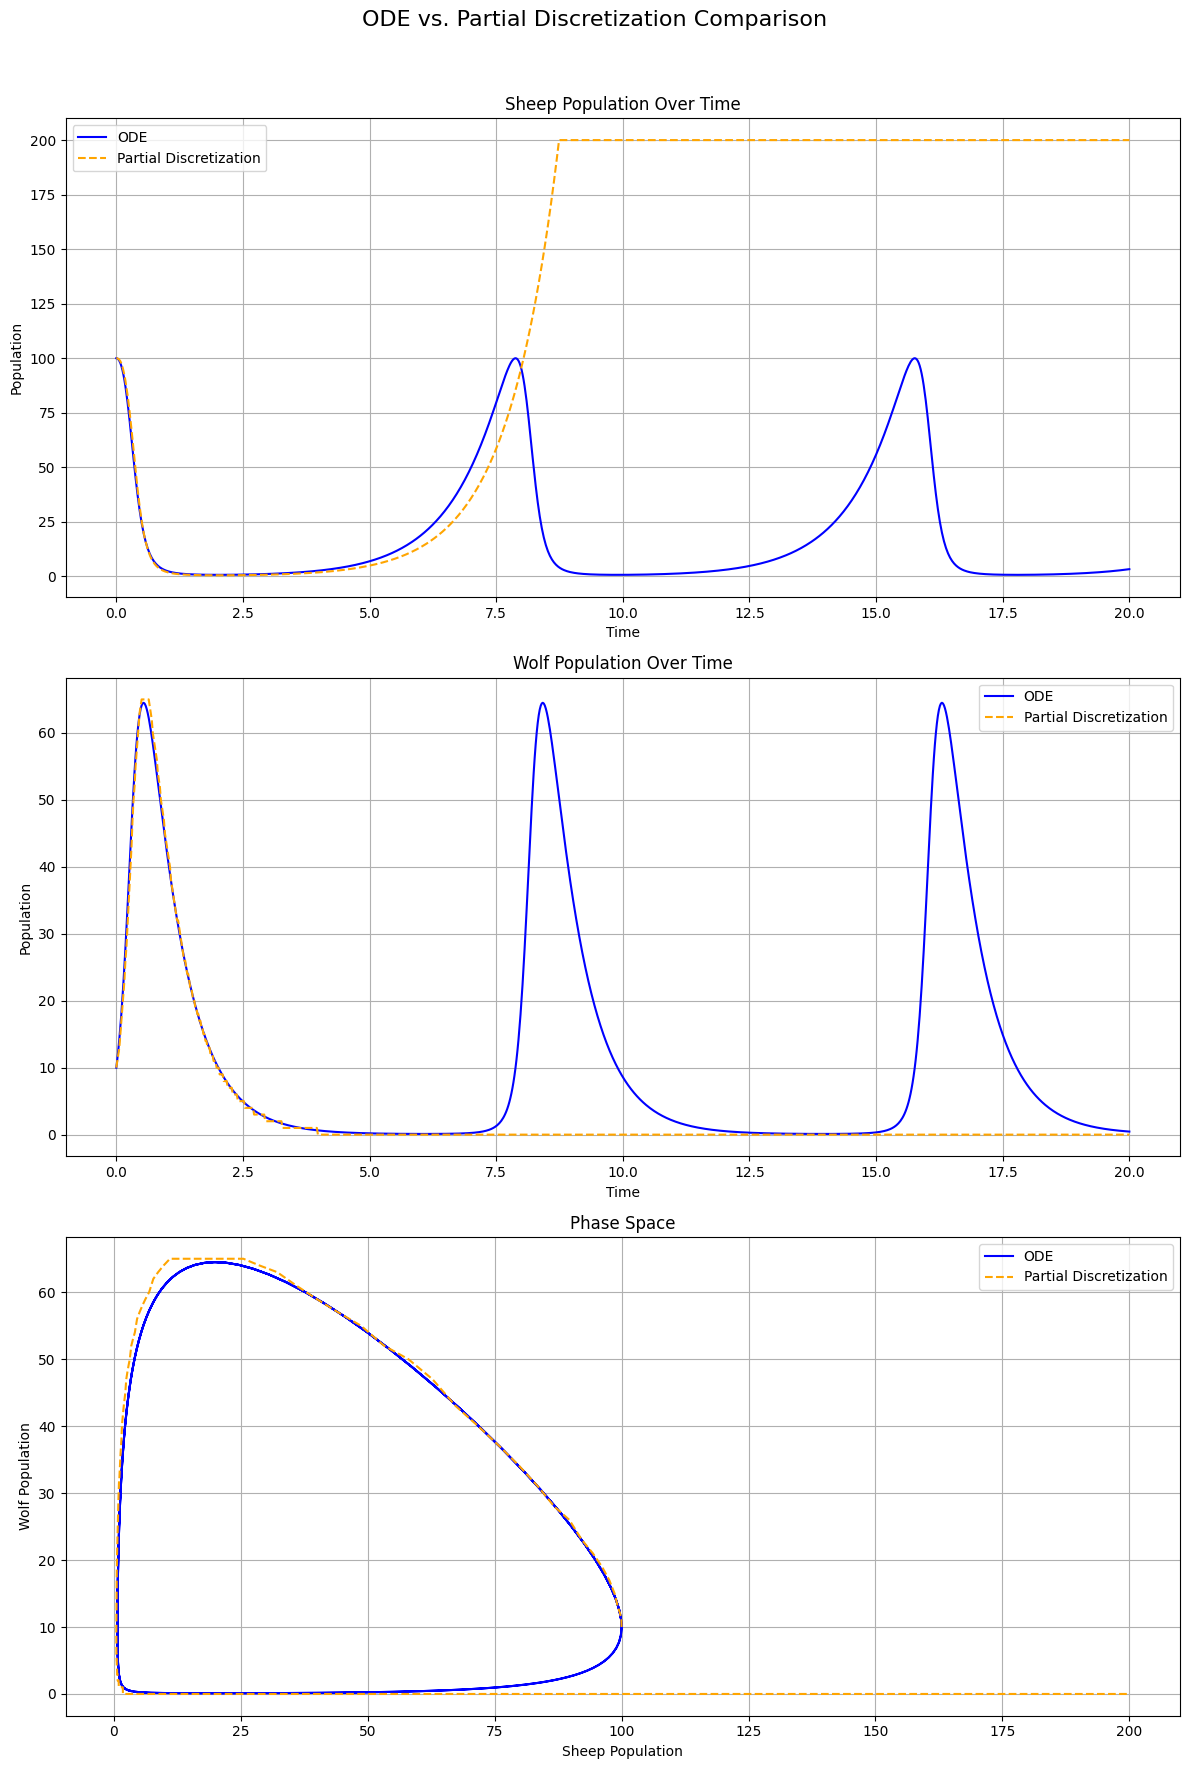

({'s': {'mae': 110.04735231773272,
   'rmse': np.float64(142.4615394399284),
   'r2': -25.849440009453577},
  'w': {'mae': 8.001232767232768,
   'rmse': np.float64(17.639085747647105),
   'r2': 0.05481392662951645}},
           t         s        w
 0      0.00  100.0000  10.0000
 1      0.02   99.8752  11.2743
 2      0.04   99.4811  12.7060
 3      0.06   98.7887  14.3080
 4      0.08   97.7697  16.0913
 ...     ...       ...      ...
 996   19.92    3.0573   0.5034
 997   19.94    3.1159   0.4908
 998   19.96    3.1758   0.4786
 999   19.98    3.2369   0.4667
 1000  20.00    3.2993   0.4551
 
 [1001 rows x 3 columns],
           t           s   w
 0      0.00  100.000000  10
 1      0.02   99.960000  11
 2      0.04   99.716098  12
 3      0.06   99.269369  13
 4      0.08   98.622133  15
 ...     ...         ...  ..
 996   19.92  200.000000   0
 997   19.94  200.000000   0
 998   19.96  200.000000   0
 999   19.98  200.000000   0
 1000  20.00  200.000000   0
 
 [1001 rows x 3 colum

In [3]:


test_prop_partial_discretization_matches_ode()

### Notes

[^1] The Wikipedia page uses the word, "density," to describe the function of the varibles x and y. We think this is both incorrect and specifically a departure from the works of Lotka and Volterra. We have removed the word from our description.